In [1]:
import yfinance as yf, numpy as np, matplotlib.pyplot as plt, pandas as pd
from finta import TA
%matplotlib inline

# Download current data and test
historical = yf.download('ETH-USD', start=pd.Timestamp.now() - pd.Timedelta(days=59), interval='2m')

# Test on previously saved Dataframe
# historical = pd.read_csv('feb_11_save_59_days', index_col='Datetime', parse_dates=True)


# Variable for graphing zoomed xlim
DISPLAY_GRAPH_DAYS = pd.Timestamp.now() - pd.Timedelta(days=5)

# Convert time zone (May cause error on saved Dataframe, comment out to test last block for profits)
historical.index = historical.index.tz_convert('US/Central')

# Adding Technical Analysis features
BBand = TA.BBANDS(historical, period=135)
historical['BB_UPPER'] = BBand['BB_UPPER']
historical['BB_LOWER'] = BBand['BB_LOWER']
historical['RSI'] = TA.RSI(historical, period=300)
historical.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,BB_UPPER,BB_LOWER,RSI
Datetime,,,,,,,,,
2022-03-22 13:46:00-05:00,2995.979980,2995.979980,2995.656982,2995.656982,2995.656982,0,3017.668007,2996.886326,51.386533
2022-03-22 13:48:00-05:00,2995.566162,2995.566162,2995.159668,2995.159668,2995.159668,0,3017.795558,2996.612334,51.315585
2022-03-22 13:50:00-05:00,2995.417725,2995.417725,2995.417725,2995.417725,2995.417725,0,3017.908375,2996.344095,51.350555
2022-03-22 13:52:00-05:00,2995.811768,2995.852295,2995.811768,2995.852295,2995.852295,4165632,3017.977903,2996.078542,51.409529
2022-03-22 13:54:00-05:00,2996.646729,2996.646729,2996.646729,2996.646729,2996.646729,0,3018.026310,2995.847963,51.517327


In [2]:
# MACD for buying
def MACDBuy(df):
    df['MACDBuy'] = df.Close.ewm(span=1700).mean() - df.Close.ewm(span=4445).mean()
    df['signalBuy'] = df.MACDBuy.ewm(span=1130).mean()

#MACD for selling
def MACDSell(df):
    df['MACDSell'] = df.Close.ewm(span=540).mean() - df.Close.ewm(span=1430).mean()
    df['signalSell'] = df.MACDSell.ewm(span=480).mean()

MACDBuy(historical)
MACDSell(historical)

# View end of dataframe
historical.tail()

,Open,High,Low,Close,Adj Close,Volume,BB_UPPER,BB_LOWER,RSI,MACDBuy,signalBuy,MACDSell,signalSell
Datetime,,,,,,,,,,,,,
2022-03-22 13:46:00-05:00,2995.979980,2995.979980,2995.656982,2995.656982,2995.656982,0,3017.668007,2996.886326,51.386533,75.563609,71.590805,38.631141,31.139093
2022-03-22 13:48:00-05:00,2995.566162,2995.566162,2995.159668,2995.159668,2995.159668,0,3017.795558,2996.612334,51.315585,75.567844,71.597838,38.590889,31.170078
2022-03-22 13:50:00-05:00,2995.417725,2995.417725,2995.417725,2995.417725,2995.417725,0,3017.908375,2996.344095,51.350555,75.572219,71.604866,38.551235,31.200769
2022-03-22 13:52:00-05:00,2995.811768,2995.852295,2995.811768,2995.852295,2995.852295,4165632,3017.977903,2996.078542,51.409529,75.576862,71.611890,38.512583,31.231171
2022-03-22 13:54:00-05:00,2996.646729,2996.646729,2996.646729,2996.646729,2996.646729,0,3018.026310,2995.847963,51.517327,75.582035,71.618910,38.475755,31.261294


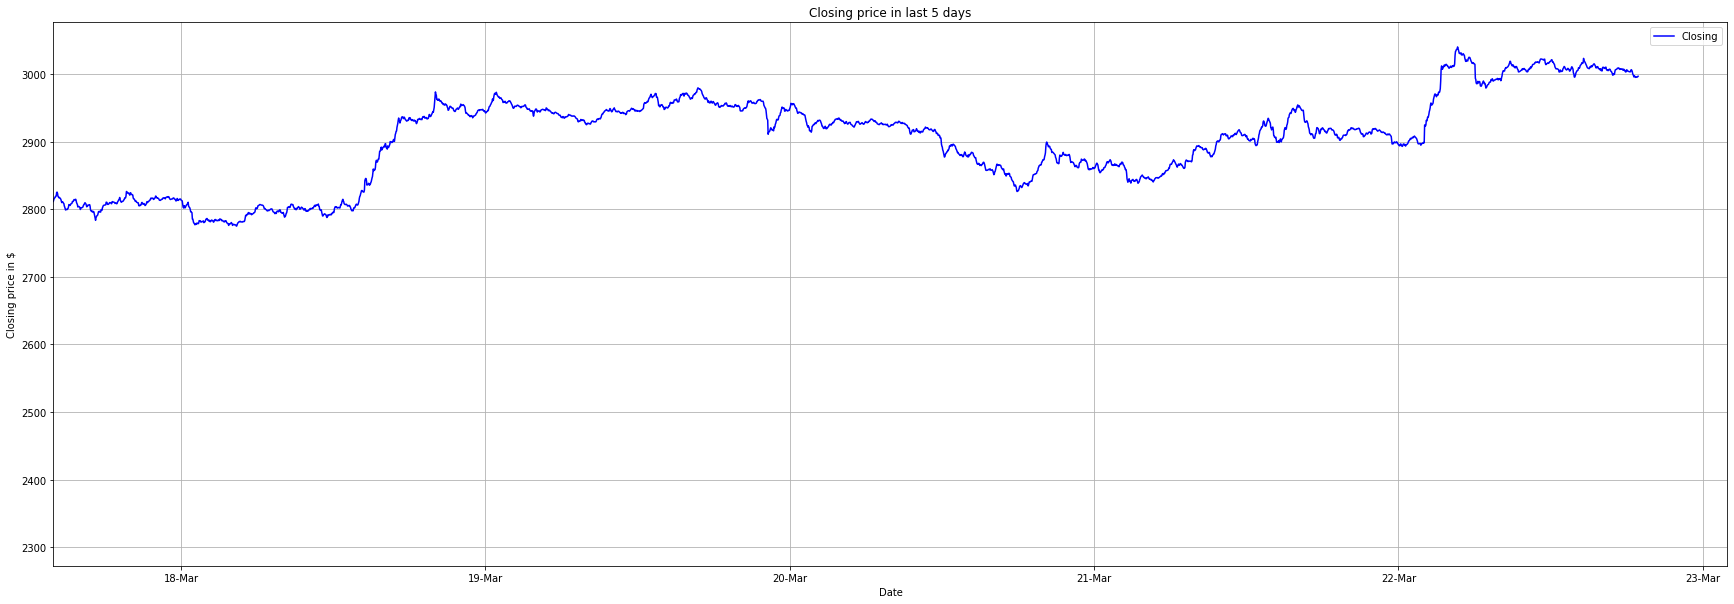

In [3]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(30,10))

ax.plot(historical['Close'],color='blue',label='Closing')
plt.title('Closing price in last 5 days')
plt.xlabel('Date')
plt.ylabel('Closing price in $')
plt.xlim(DISPLAY_GRAPH_DAYS,pd.Timestamp.now() + pd.Timedelta(hours=12))
fmt = mdates.DateFormatter('%d-%b')
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(fmt)

plt.grid(); plt.legend(); plt.show()

In [4]:
def plot_macd(buyOrSell):
    fig, ax = plt.subplots(figsize=(30,10))

    ax.plot(historical['MACD' + buyOrSell],color='blue',label='MACD')
    ax.plot(historical['signal' + buyOrSell], color='red', label='signal')
    plt.xlim(DISPLAY_GRAPH_DAYS,pd.Timestamp.now() + pd.Timedelta(hours=12))
    plt.title('MACD in the last 5 days for ' + buyOrSell + 'ing')
    plt.xlabel('Date')
    
    fmt = mdates.DateFormatter('%d-%b')
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    plt.gca().xaxis.set_major_formatter(fmt)

    plt.grid(); plt.legend(); plt.show()

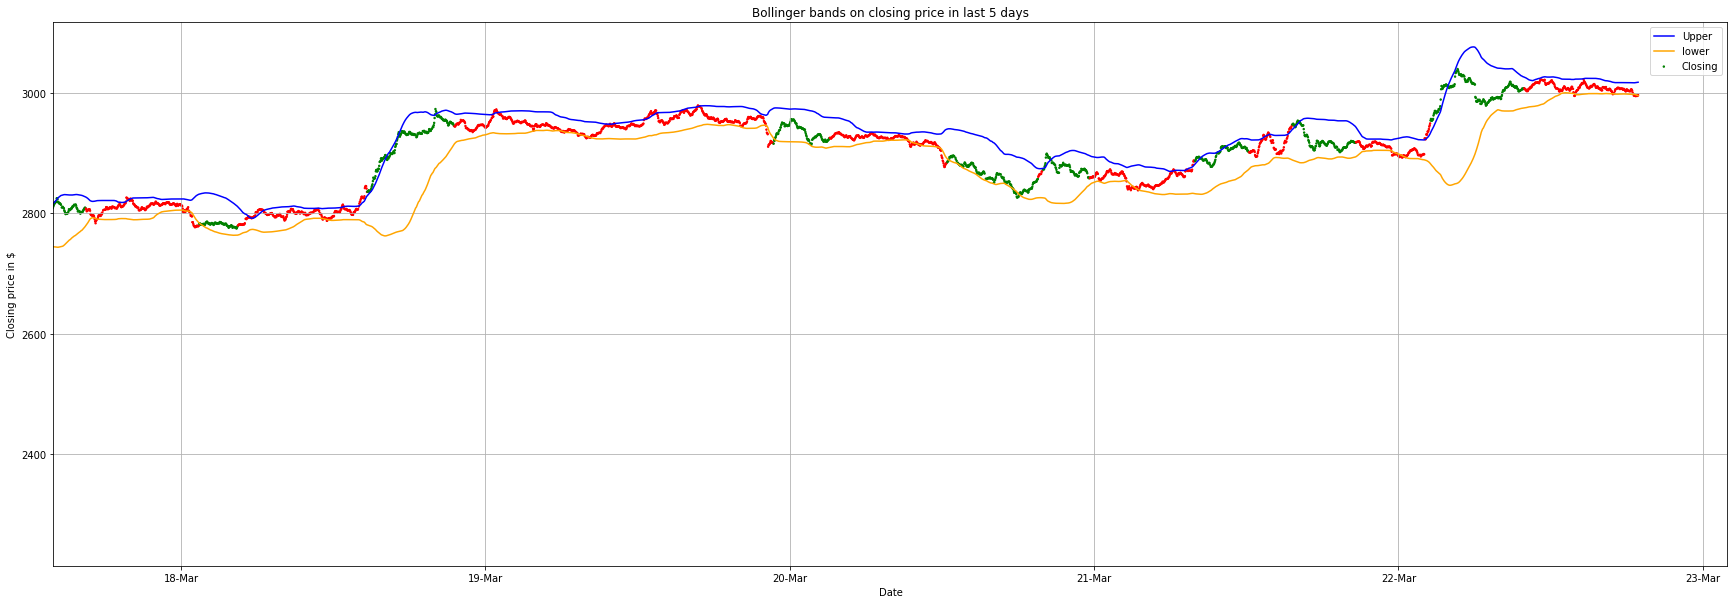

In [5]:
# Bollinger bands
# Visually display in red when trades are not volatile enough for buying
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(30,10))
# colors = ['r' if width < 40 else 'g' for width in historical['BB_UPPER'] - historical['BB_LOWER']]
colors = ['r' if width < 0.017 else 'g' for width in (historical['BB_UPPER'] - historical['BB_LOWER']) / historical['Close']]

ax.plot(historical['BB_UPPER'],color='blue',label='Upper')
ax.plot(historical['BB_LOWER'],color='orange',label='lower')
ax.scatter(historical.index, historical['Close'],color=colors,label='Closing', s=2)

plt.title('Bollinger bands on closing price in last 5 days')
plt.xlabel('Date')
plt.ylabel('Closing price in $')
plt.xlim(DISPLAY_GRAPH_DAYS,pd.Timestamp.now() + pd.Timedelta(hours=12))
# plt.ylim(2500,2700)
fmt = mdates.DateFormatter('%d-%b')
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(fmt)

plt.grid(); plt.legend(); plt.show()

In [6]:
# RSI (still being evaluated)
# fig, ax = plt.subplots(figsize=(30,10))

# ax.plot(historical['RSI'],color='blue',label='RSI')
# # ax.plot(historical['signal' + buyOrSell], color='red', label='signal')
# # plt.xlim(display_graph_days,pd.Timestamp.now() + pd.Timedelta(hours=12))

# # plt.ylim(25, 75)
# # plt.title('MACD in the last 5 months for Buying')
# plt.xlabel('Date')

# fmt = mdates.DateFormatter('%d-%b')
# plt.gca().xaxis.set_major_locator(mdates.DayLocator())
# plt.gca().xaxis.set_major_formatter(fmt)

# plt.grid(); plt.legend(); plt.show()

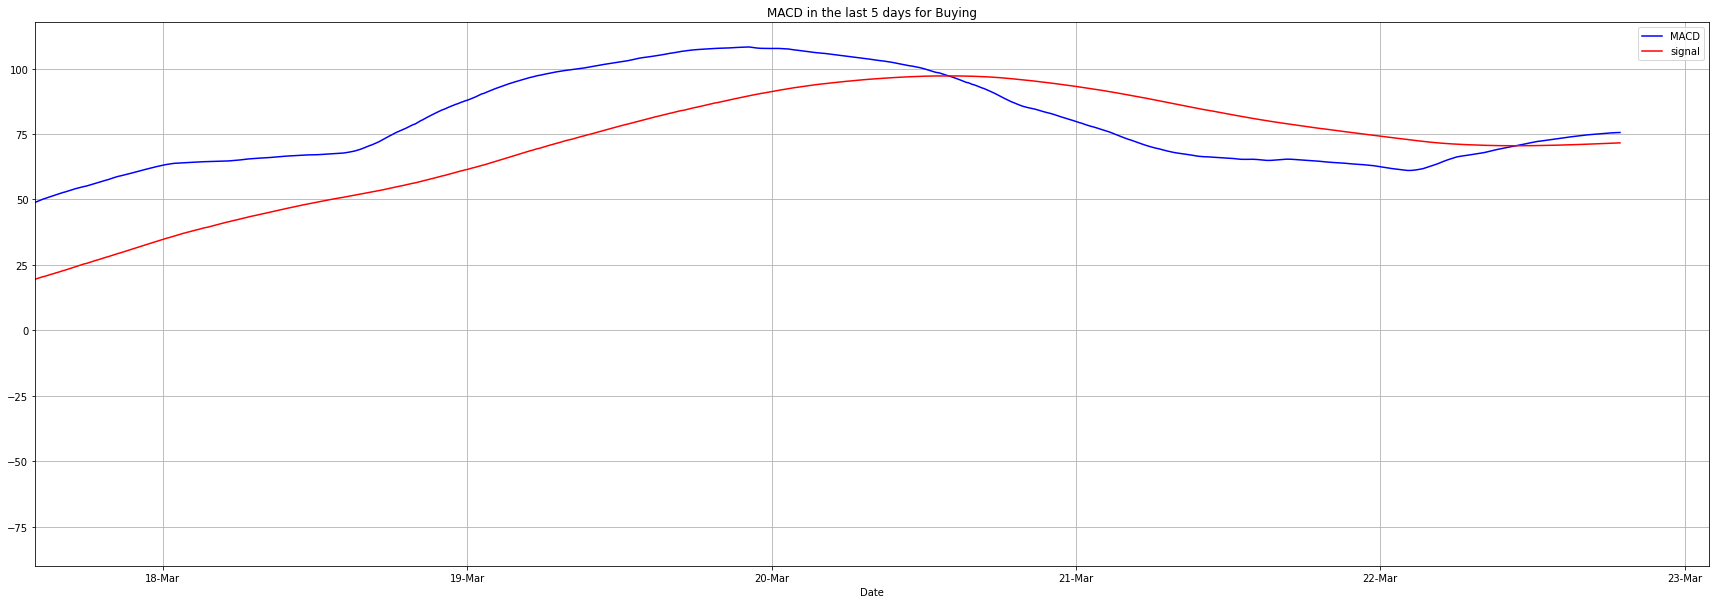

In [7]:
plot_macd("Buy")

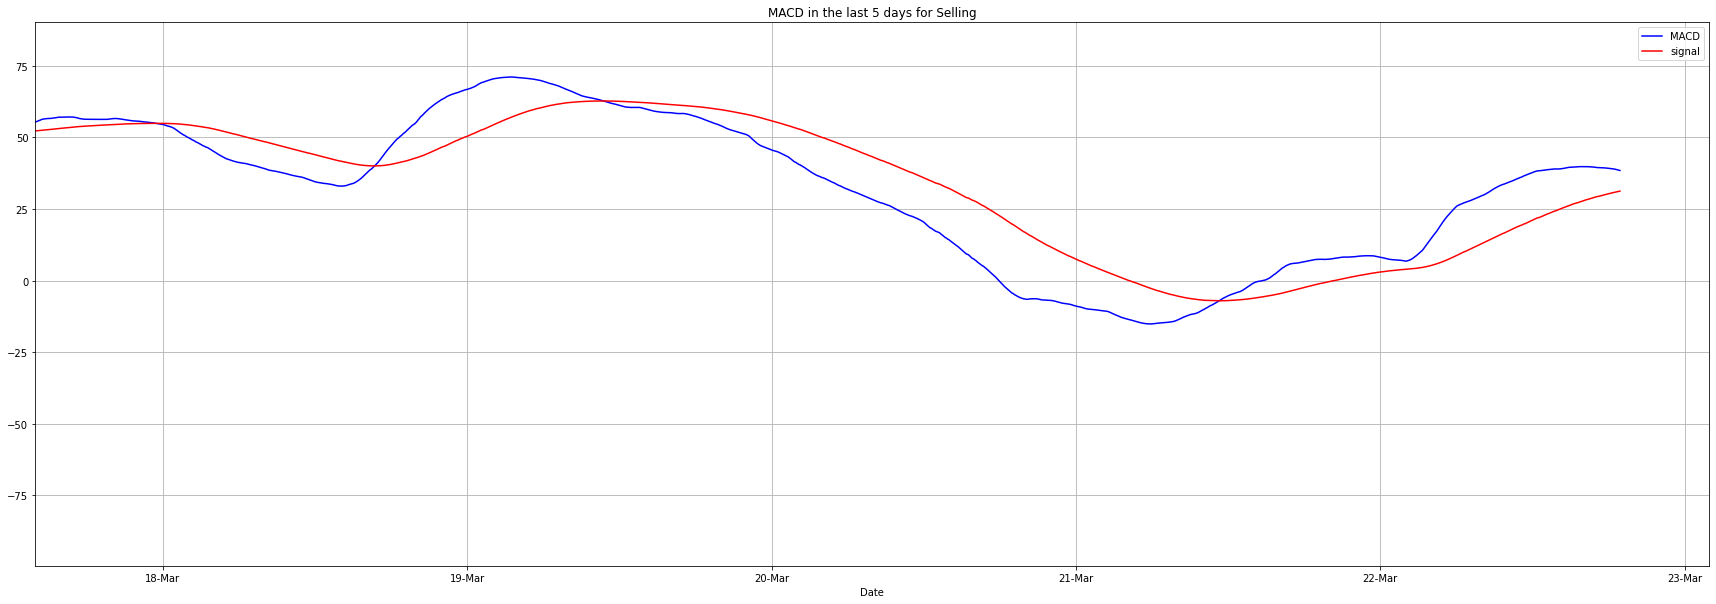

In [8]:
plot_macd("Sell")

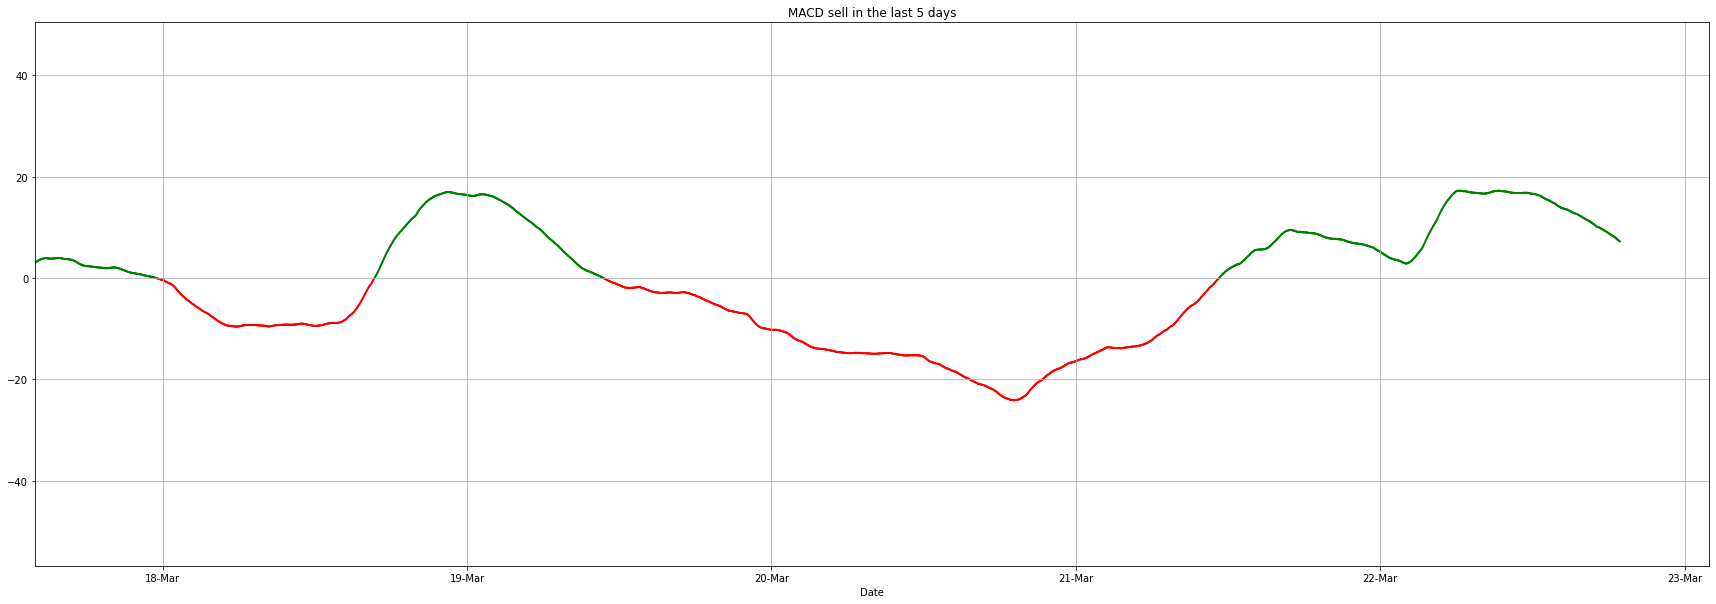

In [9]:
# Visual difference between MACD and signal for selling
fig, ax = plt.subplots(figsize=(30,10))
difference = historical['MACDSell'] - historical['signalSell']
colors = ['r' if macd < 0 else 'g' for macd in difference]
ax.scatter(historical.index, difference, color=colors, s=1)
plt.xlim(DISPLAY_GRAPH_DAYS,pd.Timestamp.now() + pd.Timedelta(hours=12))
# plt.ylim(-20,20)
plt.title('MACD sell in the last 5 days')
plt.xlabel('Date')

fmt = mdates.DateFormatter('%d-%b')
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(fmt)

plt.grid(); plt.show()

In [10]:
# Make buy and sell lists
in_position = False

buy, sell = [], []

for i in range(2, len(historical)):

    if historical['MACDBuy'].iloc[i] > historical['signalBuy'].iloc[i] and not in_position and not historical['MACDSell'].iloc[i] < historical['signalSell'].iloc[i] and (historical['BB_UPPER'].iloc[i] - historical['BB_LOWER'].iloc[i]) / historical['Close'].iloc[i] > 0.017: #and historical['BB_UPPER'].iloc[i] - historical['BB_LOWER'].iloc[i] > 40:
        buy.append(i)
        in_position = True

    elif historical['MACDSell'].iloc[i] < historical['signalSell'].iloc[i] and in_position:
        sell.append(i)
        in_position = False

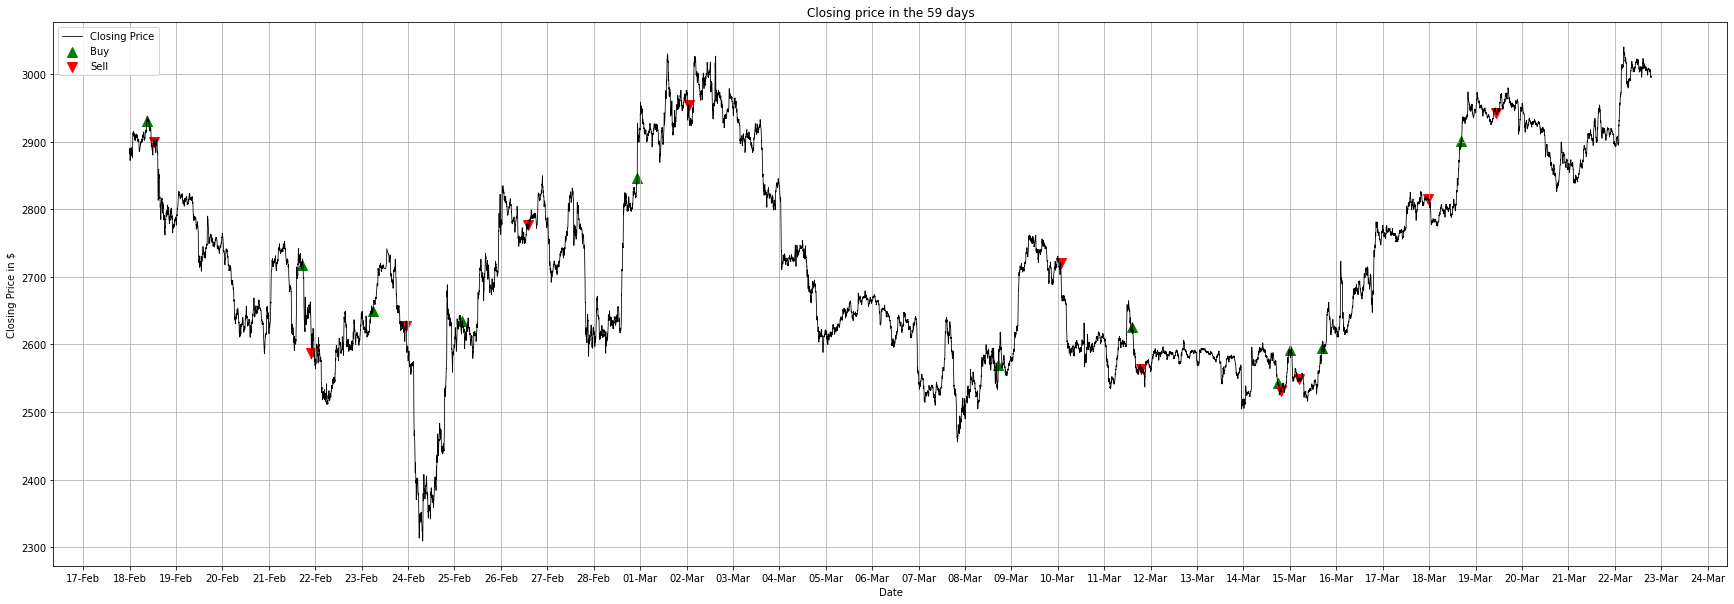

In [11]:
plt.figure(figsize=(30,10))
plt.plot(historical.Close, label='Closing Price', color='k', linewidth=.8)
plt.scatter(historical.iloc[buy].index, historical.iloc[buy].Close, marker='^', color='green', s=100, label='Buy')
plt.scatter(historical.iloc[sell].index, historical.iloc[sell].Close, marker='v', color='red', s=100, label='Sell')
plt.xlabel('Date')
plt.ylabel('Closing Price in $')
plt.title('Closing price in the 59 days')

fmt = mdates.DateFormatter('%d-%b')
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(fmt)

plt.grid(); plt.legend(); plt.show()

In [12]:
realBuyPoint = [i for i in buy]
realSellPoint = [i for i in sell]

buyPrices = historical['Close'].iloc[realBuyPoint]
sellPrices = historical['Close'].iloc[realSellPoint]

In [13]:
# Change starting_amount to match your start value of investing.

# Calculating fees and profit
if len(buyPrices) > len(sellPrices):
    buyPrices.drop(buyPrices.tail(1).index,inplace=True)

starting_amount = 10000 # in dollars
profits = []
buy_fees = np.zeros(len(buyPrices))
sell_fees = np.zeros(len(sellPrices))

for i in range(len(sellPrices)):
    profits.append(sellPrices[i] * (starting_amount / buyPrices[i]) - starting_amount)
    buy_fees[i] = (buyPrices[i] * (starting_amount / buyPrices[i]) * 0.005) # For Crypto
    sell_fees[i] = (sellPrices[i] * (starting_amount / buyPrices[i]) * 0.005)
    starting_amount = sellPrices[i] * (starting_amount / buyPrices[i])

#Pure profits
p = np.array(profits)

# fees meant for crypto
print("Buy fees: {}".format(buy_fees.sum()))
print("Sell fees: {}".format(sell_fees.sum()))

print("Total before taking fees: {}".format(p.sum()))
print("Profit: {}".format(p.sum() - buy_fees.sum() - sell_fees.sum()))
print("Percent increase: {}%".format(round((p.sum() - buy_fees.sum() - sell_fees.sum()) / 10000 * 100)))

Buy fees: 560.9873480675054
Sell fees: 567.9252873662405
Total before taking fees: 1387.5878597469982
Profit: 258.67522431325233
Percent increase: 3%
